# Lecture 5: Chapter 3 Errors and Uncertainties, Part 1

**Exercise A**: For each assigned exercise add the prompt before your solution in a
Markdown cell and format the equations with Markup/Latex.

**Exercise B**: Errors and conditional statements

 - Try the following, see what happens, modify as suggested until “Success!”

``` Python
a = 1.1
b = 2.2
x = a + b # What type of number/variable is x?
if (x == 3.3):
print( ‘Success!’ )
else:
print( ‘The value of x is not 3.3. It is ‘, x )
print( ‘The difference is %e = ‘%(x) )
```

- Modify the conditional statement until you find “Success!”
- Hint: It is best, with floating point numbers, to avoid == in conditional
statements (ints are okay). Better to check that the difference is less than some
very small tolerance, ε, or eps. Maybe $eps = 10^{-12}$, for example.

In [1]:
a = 1.1
b = 2.2
x = a + b # What type of number/variable is x? Float
#if (x == 3.3):
eps = 1E-12           # Define eps to check later
if ((x - 3.3) < eps): # Check whether the diff is less than eps
    print('Success!')
else:
    print('The value of x is not 3.3. It is ', x )
    print('The difference is %e = '%(x) )

Success!


In [2]:
type(x)

float

## 3.1.2 Subtractive Cancelation Exercises

### Landau Section 3.1.2, Exercise 1

1) Remember back in high school when you learned that the quadratic equation
    $$
    ax^2 +bx+c= 0 
    \tag{3.8}
    $$
has ananalytic solution that can be written as either
    $$ 
    x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a} 
    \space\space\text{or}\space\space
    x^{'}_{1,2} = \frac{-2c}{b \pm \sqrt{b^2-4ac}}
    \tag{3.9}
    $$

Inspection of(3.9) indicates that subtractive cancelation (and consequently an increase
in error) arises when $b2 ≫ 4ac$, as then the square root and its preceding term nearly
cancel for one of the roots.

- a) Write a program that calculates all solutions for arbitrary values of a, b, and c.

- b) Investigate how errors in your computed answers become large as the subtractive
cancelation increases, and relate this to the known machine precision. Hint: A good
test case utilizes $a= 1,b= 1,c= 10−n,n= 1,2,3,…$.

In [7]:
#del x #delete the value of x from previous entries if defined
import cmath as cm # use cmath to handle complex numbers
def quadEq(a,b,c):
    # this is the quadratic equation that takes a,b,c and reads like eq 3.8

    # calculate each part of the solution formula
    demonminator = 2*a
    numeratorplus = -b + cm.sqrt(b**2 - 4*a*c)
    numeratorminus =  -b - cm.sqrt(b**2 - 4*a*c)

    # build the actual solutions
    x1 = numeratorplus/demonminator
    x2 = numeratorminus/demonminator

    return [x1,x2] #return both solutions as an array
    

In [5]:
#del x #delete the value of x from previous entries if defined
import cmath as cm # use cmath to handle complex numbers
def quadEqAlt(a,b,c):
    # this is the quadratic equation that takes a,b,c and reads like eq 3.8

    # calculate each part of the solution formula
    numerator = -2*c
    demonminatorplus = b + cm.sqrt(b**2 - 4*a*c)
    demonminatormunis = b - cm.sqrt(b**2 - 4*a*c)
    

    # build the actual solutions
    x1 = numerator/demonminatorplus
    x2 = numerator/demonminatormunis

    return [x1,x2] #return both solutions as an array

In [8]:
print(quadEq(2,4,1)) #test the a,b,c values
print(quadEq(1,1,10))

print(quadEqAlt(2,4,1)) #test the a,b,c values
print(quadEqAlt(1,1,10))

[(-0.2928932188134524+0j), (-1.7071067811865475+0j)]
[(-0.5+3.122498999199199j), (-0.5-3.122498999199199j)]
[(-0.2928932188134525+0j), (-1.707106781186548+0j)]
[(-0.5+3.122498999199199j), (-0.5-3.122498999199199j)]


In order to solve a) I wrote a function that calculates the solution for an arbitrary set of constants provided by the user,
I wanted to use math package only for sqrt but because of the nature of quadratic equations I needed to use cmath to handle complex solutions otherwise I'll have to implement error handling when the discriminator is less than 0.
I think we can do that separately in another function if required to see if it has complex solutions and splits the real one from its complex part. That probably is outside the scope of this notebook.

In [9]:
for n in range(10):
    print(quadEq(1,1,10-n))
    print(quadEqAlt(1,1,10-n))

[(-0.5+3.122498999199199j), (-0.5-3.122498999199199j)]
[(-0.5+3.122498999199199j), (-0.5-3.122498999199199j)]
[(-0.5+2.958039891549808j), (-0.5-2.958039891549808j)]
[(-0.49999999999999994+2.958039891549808j), (-0.49999999999999994-2.958039891549808j)]
[(-0.5+2.7838821814150108j), (-0.5-2.7838821814150108j)]
[(-0.5000000000000001+2.783882181415011j), (-0.5000000000000001-2.783882181415011j)]
[(-0.5+2.598076211353316j), (-0.5-2.598076211353316j)]
[(-0.5+2.598076211353316j), (-0.5-2.598076211353316j)]
[(-0.5+2.3979157616563596j), (-0.5-2.3979157616563596j)]
[(-0.5000000000000001+2.39791576165636j), (-0.5000000000000001-2.39791576165636j)]
[(-0.5+2.179449471770337j), (-0.5-2.179449471770337j)]
[(-0.4999999999999999+2.1794494717703365j), (-0.4999999999999999-2.1794494717703365j)]
[(-0.5+1.9364916731037085j), (-0.5-1.9364916731037085j)]
[(-0.4999999999999999+1.9364916731037083j), (-0.4999999999999999-1.9364916731037083j)]
[(-0.5+1.6583123951777j), (-0.5-1.6583123951777j)]
[(-0.5+1.6583123951

I don't actually know what im looking for in here, so lets try get the difference of the solutions so it becomes clearer

In [17]:
# Function to compute the error between the two roots
def compute_error(a, b, c):
    roots = quadEq(a, b, c)
    rootsAlt = quadEqAlt(a, b, c)
    x1, x2 = roots[0], roots[1]
    x1Alt, x2Alt = rootsAlt[0], rootsAlt[1]
    
    # Compute the relative error between the roots
    error1 = abs((x1 - x1Alt) / x1)
    error2 = abs((x2 - x2Alt) / x2)
    
    return [error1, error2]


In [37]:
compute_error(1,1,10)

[0.0, 0.0]

Now let's try the loop again but with the difference instead

In [21]:
# Investigate how error increases with decreasing c
for n in range(1, 10):  # We go from 10^-1 to 10^-9 for c
    c_value = 10**(-n)
    error, error2 = compute_error(1, 1, c_value)  # a=1, b=1, c=10^(-n)
    print(f"n = {n}, c = {c_value}, ErrorX1 = {error:.2e}, ErrorX2 = {error2:.2e}")

n = 1, c = 0.1, ErrorX1 = 1.23e-16, ErrorX2 = 1.25e-16
n = 2, c = 0.01, ErrorX1 = 2.06e-15, ErrorX2 = 2.02e-15
n = 3, c = 0.001, ErrorX1 = 2.43e-14, ErrorX2 = 2.42e-14
n = 4, c = 0.0001, ErrorX1 = 5.56e-14, ErrorX2 = 5.56e-14
n = 5, c = 1e-05, ErrorX1 = 1.66e-12, ErrorX2 = 1.66e-12
n = 6, c = 1e-06, ErrorX1 = 4.63e-12, ErrorX2 = 4.63e-12
n = 7, c = 1e-07, ErrorX1 = 5.12e-11, ErrorX2 = 5.12e-11
n = 8, c = 1e-08, ErrorX1 = 5.76e-10, ErrorX2 = 5.76e-10
n = 9, c = 1e-09, ErrorX1 = 2.62e-08, ErrorX2 = 2.62e-08


Now we can see clearly how the error increases as c decreases

### Landau Section 3.1.2, Exercise 2

2) As we have seen, subtractive cancelation occurs when summing a series with alternating
signs. As another example, consider the finite sum
$$ S^{(1)}_{N}= \sum_{n=1}^{2N} (-1)^n \frac{n}{n+1}. \tag{3.10}$$

If you sum the even and odd values of $n$ separately, you get two sums:
$$ S^{(2)}_{N}= -\sum_{n=1}^{N}\frac{2n - 1}{2n} + \sum_{n=1}^{N}\frac{2n}{2n+1}. \tag{3.11}$$

All terms are positive in this form with just a single subtraction at the end of the cal-

culation. Yet even this one subtraction and its resulting cancelation can be avoided by
combining the series analytically to obtain
$$ S^{(3)}_{N}= \sum_{n=1}^{N}\frac{1}{2n(2n+1)}. \tag{3.12}$$

Although all three summations $S^{(1)}$ ,$S^{(2)}$, and $S^{(3)}$ are mathematically equal, they may
give different numerical results.

- 1) Write a double-precision program that calculates $S^{(1)}$ ,$S^{(2)}$, and $S^{(3)}$ .
     
- 2) Assume $S^{(3)}$ to be the exact answer. Make a log–log plot of the relative error versus the
number of terms, that is, of $log_{10}|(S^{(1)}_{N} - S^{(3)}_{N})/S^{(3)}_{N}|$ versus $log_{10}(N)$. Start with $N= 1$
and work up to $N = 1,000,000$. (Recall that $log_{10}x = ln x∕ln10$.) The negative of the
ordinate in this plot gives an approximate value for the number of significant figures.

- 3) See whether straight-line behavior for the error occurs in some regions of your plot.

This indicates that the error is proportional to a power of $N$.

In [3]:
def S1N(N):
    #this function returns the value of eq 3.10 up to a given N
    return sum((-1)**n * n / (n + 1) for n in range(1, 2 * N + 1)) #add +1 since arrays start at 0 and we started it at 1

In [4]:
S1N(20)

0.29480637430486667

In [11]:
def S2N(N):
    #this function returns the value of eq 3.11 up to a given N
    #Since it has to components lets split them so each sum iterates independently 

    first = -sum((2*n - 1)/(2*n) for n in range(1, N + 1))
    second = sum((2*n)/(2*n+1) for n in range(1, N + 1))
    return first + second

In [12]:
S2N(2)

0.21666666666666679

In [13]:
def S3N(N):
    #this function returns the value of eq 3.12 up to a given N
    return sum(1/(2*n*(2*n+1)) for n in range(1, N + 1))

In [14]:
S3N(2)

0.21666666666666667

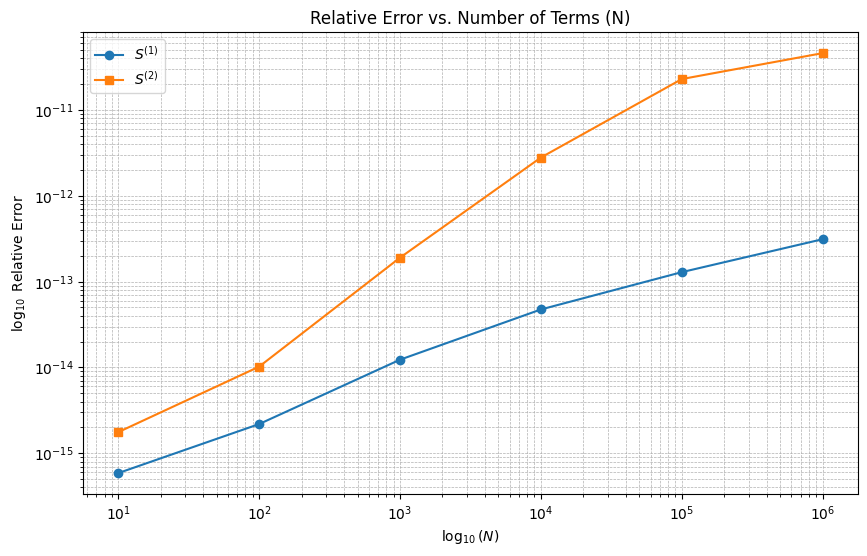

In [15]:
import matplotlib.pyplot as plt

# Create an array that goes from 1 to 1,000,000 (log scale in 10^i steps)
Ns = [10**i for i in range(1, 7)]  
relative_errors_S1 = [] #two empty arrays to store the relative errors
relative_errors_S2 = []

#obtain an array of the errors for each sum 
for N in Ns:
    #store the values of each N locally so only calls functions once per cycle
    S1_N = S1N(N) 
    S2_N = S2N(N)
    S3_N = S3N(N)  # Assume S^(3)_N is the exact answer
    
    error_S1 = abs((S1_N - S3_N) / S3_N)  # Relative error for S^(1)_N
    error_S2 = abs((S2_N - S3_N) / S3_N)  # Relative error for S^(2)_N
    
    relative_errors_S1.append(error_S1) #add the result to the empty arrays
    relative_errors_S2.append(error_S2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(Ns, relative_errors_S1, label=r"$S^{(1)}$", marker="o", linestyle="-")
plt.loglog(Ns, relative_errors_S2, label=r"$S^{(2)}$", marker="s", linestyle="-")
plt.xlabel(r"$\log_{10}(N)$")
plt.ylabel(r"$\log_{10}$ Relative Error")
plt.title("Relative Error vs. Number of Terms (N)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Landau Section 3.1.2, Exercise 3

3) Inspite of the power of your trusty computer, calculating the sum of even a simple series
may require some thought and care. Consider the two series


$$
S^{(up)} = \sum_{n=1}^{N} \frac{1}{n} \text{,}\space S^{(down)} = \sum_{n=N}^{1} \frac{1}{n} \tag{3.13}
$$

Both series are finite as long as $N$ is finite, and when summed analytically both give the
same answer. Nonetheless, because of round-off error, the numerical value of $S^{(up)}$ will
not be precisely that of $S^{(down)}$.

- a) Write a program to calculate $S^{(up)}$ and $S^{(down)}$ as functions of $N$.
- b) Make a log–log plot of $(S^{(up)} − S^{(down)})∕(|S^{(up)}| +|S^{(down)}|)$ versus $N$.
- c) Observe the linear regime on your graph and explain why the downward sum is generally more precise.

In [16]:
def Sup(N):
    return sum(1/n for n in range(1, N + 1))

def Sdown(N):
    return sum(1/n for n in range(N,0, -1)) #to go backwards from N to 0

In [17]:
u=Sup(10000000)
u

16.69531136585985

In [18]:
d=Sdown(10000000)
d

16.69531136585985

In [19]:
# Function to calculate relative error between S^(up)_N and S^(down)_N
def relative_error(Sup_N, Sdown_N):
    return abs(Sup_N - Sdown_N) / (abs(Sup_N) + abs(Sdown_N))

In [20]:
relative_error(u,d)

0.0

That won't do. It seems like we need more precision, so I'm going to try cycling
and acumulating values so each calculation stacks an error. So let's redifine 
Sup and Sdown as newSup and newSdown, then we can try relative_error(nu,nd) for new values

In [21]:
# Function to calculate S^(up)_N with pairwise summation
def nSup(N):
    total = 0.0
    for n in range(1, N+1):
        total += 1/n
    return total

# Function to calculate S^(down)_N with pairwise summation
def nSdown(N):
    total = 0.0
    for n in range(N, 0, -1):
        total += 1/n
    return total

In [22]:
nu=nSup(10000000)
nu

16.695311365857272

In [23]:
nd=nSdown(10000000)
nd

16.695311365859965

Now that's different, let's try get the relative error of it

In [24]:
relative_error(nu,nd)

8.06500971894957e-14

So, with that, I think we can finally print a plot to see the behavior as N increases

N = 10: Sup_N = 2.9289682539682538, Sdown_N = 2.9289682539682538
N = 100: Sup_N = 5.187377517639621, Sdown_N = 5.1873775176396215
N = 1000: Sup_N = 7.485470860550343, Sdown_N = 7.485470860550341
N = 10000: Sup_N = 9.787606036044348, Sdown_N = 9.787606036044386
N = 100000: Sup_N = 12.090146129863335, Sdown_N = 12.090146129863408
N = 1000000: Sup_N = 14.392726722864989, Sdown_N = 14.392726722865772
N = 10000000: Sup_N = 16.695311365857272, Sdown_N = 16.695311365859965


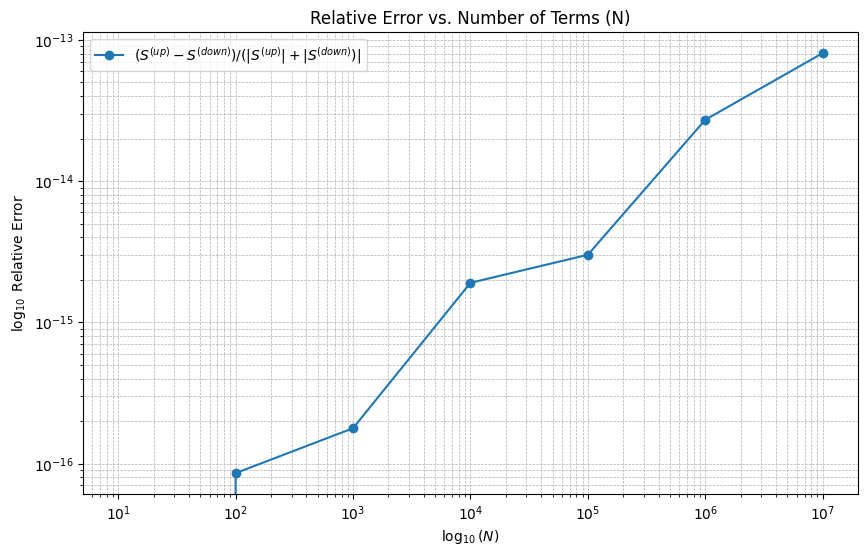

In [25]:
Ns = [10**i for i in range(1, 8)]  # N from 10 to 10,000,000 (log scale)
relative_errors = []

for N in Ns:
    Sup_N = nSup(N)
    Sdown_N = nSdown(N)
    
    # Print the sums to check for differences
    print(f"N = {N}: Sup_N = {Sup_N}, Sdown_N = {Sdown_N}")
    
    error = relative_error(Sup_N, Sdown_N)
    relative_errors.append(error)

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(Ns, relative_errors, label=r"$(S^{(up)} - S^{(down)}) / (|S^{(up)}| + |S^{(down)})|$", marker="o", linestyle="-")
plt.xlabel(r"$\log_{10}(N)$")
plt.ylabel(r"$\log_{10}$ Relative Error")
plt.title("Relative Error vs. Number of Terms (N)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


I guess Sdown is more precise since we are alocating memory of the bigger numbers first


# Lecture 6: Chapter 3 Errors and Uncertainties, Part 2

**Exercise A**: For each assigned exercise continue adding the prompt before your
solution in a Markdown cell and format the equations with Markup/Latex.

**Exercise C**: See the code BesselMatplotlib.ipynb on Blueline. It is the same as
Landau’s version except uses Matplotlib rather than VPython for graphics.
- After reviewing/understanding the code, modify the code to plot Bessel
functions for orders l = 0, 1, 2, 3. Reproduce Figure 3.5 and the specific values in
Table 3.1.

First I added the orders array to input, changed Y0 and Y1 to just yVals

``` python
xAxis = []; yVals = []; orders =[0,1,2,3]; #added the orders array to input, changed Y0 and Y1 to just yVals
for x in np.arange(Xmin, Xmax, step):
    xAxis.append(x)
    for order in orders:
        yVals.append( down(x, order, start))

print(len(xAxis))
print(len(yVals)) #yVals has 4times the size of our axis, since we have 4 orders
```

```
>>> 398
>>> 1592
```

But that didn't work since I don't know where each order ends and the other starts, I need to store them in separate columns

In [48]:
# BesselMatplotlib.py Spherical Bessel function by recursion
# From Landau's .../VPythonCodes/bessel.py website modified
# to use Matplotlib for graphics

import numpy as np
import matplotlib.pyplot as plt

Xmax = 40.
Xmin = 0.25
step = 0.1                       # Global class variable
start = 50           # Plot j_order

def down(x, n, m=25):               # Method down, recurs downward
    j = np.zeros( (start + 2), float)
    j[m + 1] = j[m] = 1.         # Start with anything
    for k in range(m, 0, -1):
        j[k - 1] = ( (2.*k + 1.)/x)*j[k] - j[k + 1]
    scale = (np.sin(x)/x)/j[0]      # Scale solution to known j[0]
    return j[n]*scale

xAxis = []; orders =[0,1,2,3]; #declare an empty array for xValues and the 4 orders I need
# declare a 4x1 array for Yvalues
yVals = [[],[],[],[]]

for x in np.arange(Xmin, Xmax, step): #fill up xAxis first
    xAxis.append(x)

for x in np.arange(Xmin, Xmax, step): #fill up each order
    for order in orders:
        yVals[order].append(down(x, order, start))  # Store in respective order list

print(len(yVals[0])) # now the size of it is 4
print(len(xAxis))

398
398


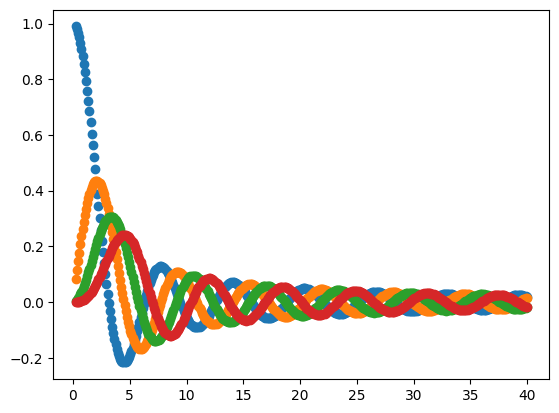

In [39]:
# Plot Bessel functions
for order in orders:
    plt.scatter(xAxis, yVals[order], label=f'j_{order}(x)')

In [40]:
# Print select Bessel function info in a loop
x_values = [0.1, 1, 10]
n = [3, 5, 8]

print('x        ' + '  '.join([f'j{l}(x)' for l in n]))
for x in x_values:
    results = [down(x, l, start) for l in n]
    print(f'{x:<8} ' + '  '.join(f'{r:.6e}' for r in results))


x        j3(x)  j5(x)  j8(x)
0.1      9.518520e-06  9.616310e-10  2.901200e-16
1        9.006581e-03  9.256116e-05  2.826499e-08
10       -3.949584e-02  -5.553451e-02  1.255780e-01


## Landau Section 3.4.2 Exercise: Implementation and Assessment: Recursion Relations
- Hints:
    - Part 1: Much of this is copying, pasting, modifying to create an up() function. You may need a “stop” variable (same as start for downward recursion), reverse the list in your for loop over Bessel function order,
    - Part 3: I think just plotting the up and down Bessel functions j_l(x) will show some interesting behavior. What happens if you decrease the step size?

### 3.4.2 Implementation and Assessment: Recursion Relations

A program implementing recurrence relations is most easily written using subscripts.
If you need to polish upon your skills with subscripts, you may want to study our program
`Bessel.py` in Listing3.1 before writing your own.

- 1) Write a program that uses both up ward and downward recursion to calculate $j_l(x)$ for
the first 25 $l$ values for x = 0.1,1,and 10.

- 2) Tune your program so that at least one method gives “good” values (meaning a relative
error ≃ 10−10). See Table3.1 for some sample values.

- 3) Show the convergence and stability of your results.

- 4) Compare the upward and downward recursion methods, printing out $l,j_l^{(up)}$, $j_l^{(down)}$, and
the relative difference $|j_l^{(up)}-j_l^{(down)}|/(|j_l^{(up)}|+|j_l^{(down)}|)$.

- 5) The errors in computation depend on x, and for certain values of x, both up and down
recursions give similar answers. Explain the reason for this.

I think we already have down running from previous exercise, so let's build the up function now

In [49]:
def up(x, n, m=25):
    j = np.zeros(m + 2, float)
    j[0] = np.sin(x) / x  # Known initial conditions Eq 3.43
    j[1] = (np.sin(x)/x**2) - (np.cos(x)/x)  
    for l in range(1, m):
        j[l + 1] = ((2. * l + 1.) / x) * j[l] - j[l - 1]
    return j[n]

In [42]:
# Print select Bessel function info in a loop
x_values = [0.1, 1, 10]
n = [3, 5, 8]

print('x        ' + '  '.join([f'j{l}(x)' for l in n]))
for x in x_values:
    results = [up(x, l, 25) for l in n]
    print(f'{x:<8} ' + '  '.join(f'{r:.6e}' for r in results))


x        j3(x)  j5(x)  j8(x)
0.1      9.518517e-06  -1.445698e-08  -3.306558e-02
1        9.006581e-03  9.256116e-05  2.817901e-08
10       -3.949584e-02  -5.553451e-02  1.255780e-01


With that now we have reproduced table 3.1 with both methods, but we are yet to understand how this upward method fails
Then again I'm not sure should we compare the values of both methods? let's try that

In [54]:
def compare_methods(x, m=25):
    j_up = np.array([up(x, n) for n in range(m + 1)])
    j_down = np.array([down(x, n) for n in range(m + 1)])
    
    relative_difference = np.abs(j_up - j_down) / (np.abs(j_up) + np.abs(j_down))

    print(f"l \t j_l^up \t j_l^down \t Relative Difference")
    for n in range(m + 1):
        print(f"{n} \t {j_up[n]:.6e} \t {j_down[n]:.6e} \t {relative_difference[n]:.6e}")
        
    plt.figure(figsize=(8, 5))
    plt.plot(range(m + 1), j_up, 'bo-', label="Up")
    plt.plot(range(m + 1), j_down, 'ro-', label="Down", alpha=0.6)
    plt.yscale('log')
    plt.xlabel("l")
    plt.ylabel("j_l(x)")
    plt.title(f"Comparison Recursions when (x={x})")
    plt.legend()
    plt.show()

l 	 j_l^up 	 j_l^down 	 Relative Difference
0 	 9.983342e-01 	 9.983342e-01 	 0.000000e+00
1 	 3.330001e-02 	 3.330001e-02 	 2.458826e-14
2 	 6.661906e-04 	 6.661906e-04 	 3.677803e-11
3 	 9.518517e-06 	 9.518520e-06 	 1.286171e-07
4 	 1.056007e-07 	 1.057720e-07 	 8.106305e-04
5 	 -1.445698e-08 	 9.616310e-10 	 1.000000e+00
6 	 -1.695869e-06 	 7.397541e-12 	 1.000000e+00
7 	 -2.204485e-04 	 4.931887e-14 	 1.000000e+00
8 	 -3.306558e-02 	 2.901200e-16 	 1.000000e+00
9 	 -5.620928e+00 	 1.526986e-18 	 1.000000e+00
10 	 -1.067943e+03 	 7.271511e-21 	 1.000000e+00
11 	 -2.242625e+05 	 3.161582e-23 	 1.000000e+00
12 	 -5.157930e+07 	 1.264651e-25 	 1.000000e+00
13 	 -1.289460e+10 	 4.683954e-28 	 1.000000e+00
14 	 -3.481490e+12 	 1.615174e-30 	 1.000000e+00
15 	 -1.009619e+15 	 5.210291e-33 	 1.000000e+00
16 	 -3.129785e+17 	 1.578890e-35 	 1.000000e+00
17 	 -1.032819e+20 	 4.511148e-38 	 1.000000e+00
18 	 -3.614835e+22 	 1.219238e-40 	 1.000000e+00
19 	 -1.337479e+25 	 3.126270e-43 	 1.00

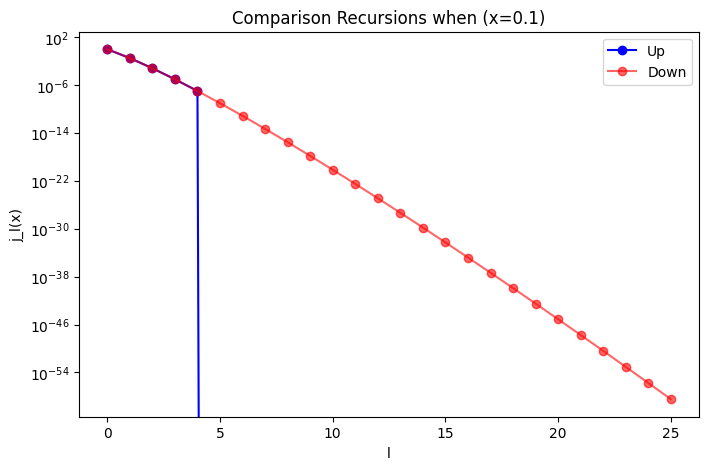

l 	 j_l^up 	 j_l^down 	 Relative Difference
0 	 8.414710e-01 	 8.414710e-01 	 0.000000e+00
1 	 3.011687e-01 	 3.011687e-01 	 0.000000e+00
2 	 6.203505e-02 	 6.203505e-02 	 1.062617e-15
3 	 9.006581e-03 	 9.006581e-03 	 3.775082e-14
4 	 1.011016e-03 	 1.011016e-03 	 2.290301e-12
5 	 9.256116e-05 	 9.256116e-05 	 2.214704e-10
6 	 7.156936e-06 	 7.156936e-06 	 3.118367e-08
7 	 4.790077e-07 	 4.790134e-07 	 6.014136e-06
8 	 2.817901e-08 	 2.826499e-08 	 1.523256e-03
9 	 3.550071e-11 	 1.491377e-09 	 9.534989e-01
10 	 -2.750450e-08 	 7.116553e-11 	 1.000000e+00
11 	 -5.776299e-07 	 3.099552e-12 	 1.000000e+00
12 	 -1.325798e-05 	 1.241663e-13 	 1.000000e+00
13 	 -3.308720e-04 	 4.604638e-15 	 1.000000e+00
14 	 -8.920285e-03 	 1.589576e-16 	 1.000000e+00
15 	 -2.583574e-01 	 5.132686e-18 	 1.000000e+00
16 	 -8.000159e+00 	 1.556708e-19 	 1.000000e+00
17 	 -2.637469e+02 	 4.451178e-21 	 1.000000e+00
18 	 -9.223141e+03 	 1.203856e-22 	 1.000000e+00
19 	 -3.409925e+05 	 3.088742e-24 	 1.000000e

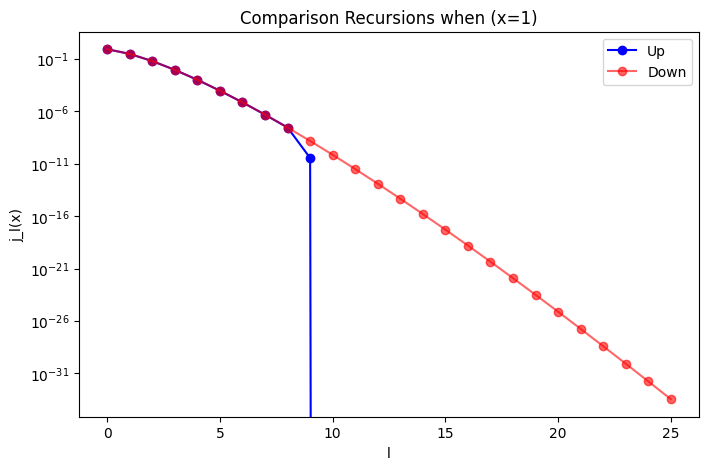

l 	 j_l^up 	 j_l^down 	 Relative Difference
0 	 -5.440211e-02 	 -5.440211e-02 	 0.000000e+00
1 	 7.846694e-02 	 7.846694e-02 	 8.843079e-17
2 	 7.794219e-02 	 7.794219e-02 	 0.000000e+00
3 	 -3.949584e-02 	 -3.949584e-02 	 1.756867e-16
4 	 -1.055893e-01 	 -1.055893e-01 	 6.571589e-17
5 	 -5.553451e-02 	 -5.553451e-02 	 6.247371e-17
6 	 4.450132e-02 	 4.450132e-02 	 1.559256e-16
7 	 1.133862e-01 	 1.133862e-01 	 1.223939e-16
8 	 1.255780e-01 	 1.255780e-01 	 1.105113e-16
9 	 1.000964e-01 	 1.000964e-01 	 2.079663e-16
10 	 6.460515e-02 	 6.460515e-02 	 4.296186e-16
11 	 3.557441e-02 	 3.557441e-02 	 1.170318e-15
12 	 1.721600e-02 	 1.721600e-02 	 3.627442e-15
13 	 7.465584e-03 	 7.465584e-03 	 1.609112e-14
14 	 2.941078e-03 	 2.941078e-03 	 8.898995e-14
15 	 1.063543e-03 	 1.063543e-03 	 6.010531e-13
16 	 3.559041e-04 	 3.559041e-04 	 4.832550e-12
17 	 1.109407e-04 	 1.109407e-04 	 4.539755e-11
18 	 3.238847e-05 	 3.238847e-05 	 4.911496e-10
19 	 8.896627e-06 	 8.896627e-06 	 6.049666e-0

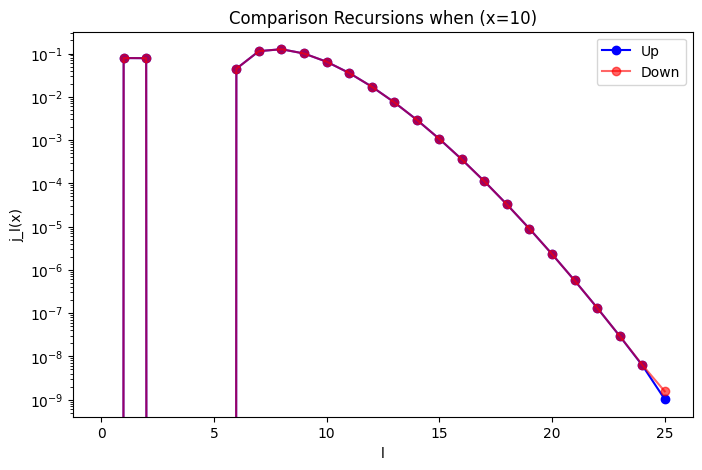

In [55]:
for x in [0.1, 1, 10]:
    compare_methods(x)